#Alternating Direction Method of Multipliers (ADMM) and splitting across examples (Consensus Algorithm)

Using kaggle data https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer

In [ ]:
#importing libraries
import numpy as np
from numpy.linalg import inv,norm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,LabelBinarizer,MinMaxScaler
import time
import scipy
from tqdm import tqdm_notebook
from multiprocessing import cpu_count

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
colors=['#011f4b','#03396c','#005b96','#6497b1','#b3cde0']
sns.set_palette(sns.color_palette(colors))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/SPBD/')


In [ ]:
!unzip SPBD_cv.zip


Archive:  SPBD_cv.zip
replace survey lung cancer.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: survey lung cancer.csv  


In [ ]:
!ls


 SPBD_cv.zip  'survey lung cancer.csv'


In [ ]:
#import data
df = pd.read_csv('survey lung cancer.csv')
df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


##Dataset Description

In [ ]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


<Axes: >

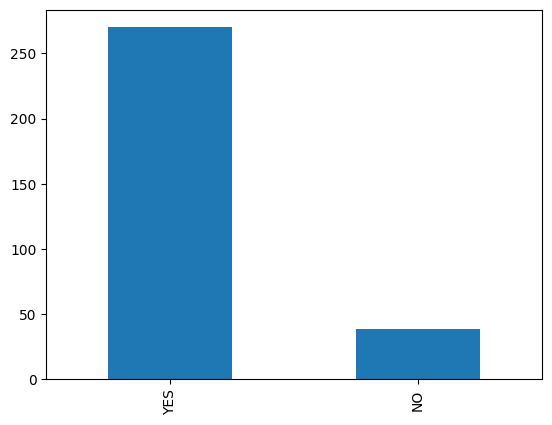

In [ ]:
df['LUNG_CANCER'].value_counts().plot(kind='bar')

In [ ]:
#Check for null values
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
#Check for duplicates in the dataset
df.duplicated().sum()

33

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(276, 16)

In [ ]:
import pandas as pd

# Assuming you have your DataFrame named 'df'
# Replace 2 with 1 and 1 with 0 in the entire DataFrame
df.replace({2: 1, 1: 0}, inplace=True)

# Print the modified DataFrame
print(df)


    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        0               1        1              0   
1        M   74        1               0        0              0   
2        F   59        0               0        0              1   
3        M   63        1               1        1              0   
4        F   63        0               1        0              0   
..     ...  ...      ...             ...      ...            ...   
279      F   59        0               1        1              1   
280      F   59        1               0        0              0   
281      M   55        1               0        0              0   
282      M   46        0               1        1              0   
283      M   60        0               1        1              0   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  0         1         0         1                  1   
1                  1         1       

In [ ]:
#A short preprocessing step before we move on to Exploratory Data Analysis for easy implementation of graphs. Here we are encoding LUNG_CANCER and GENDER column.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['LUNG_CANCER']=encoder.fit_transform(df['LUNG_CANCER'])
df['GENDER']=encoder.fit_transform(df['GENDER'])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


## Exploratory Data Analysis

In [ ]:
#separating continuous and categorical columns
con_col = ['AGE']
cat_col=[]
for i in df.columns:
    if i!='AGE':
        cat_col.append(i)

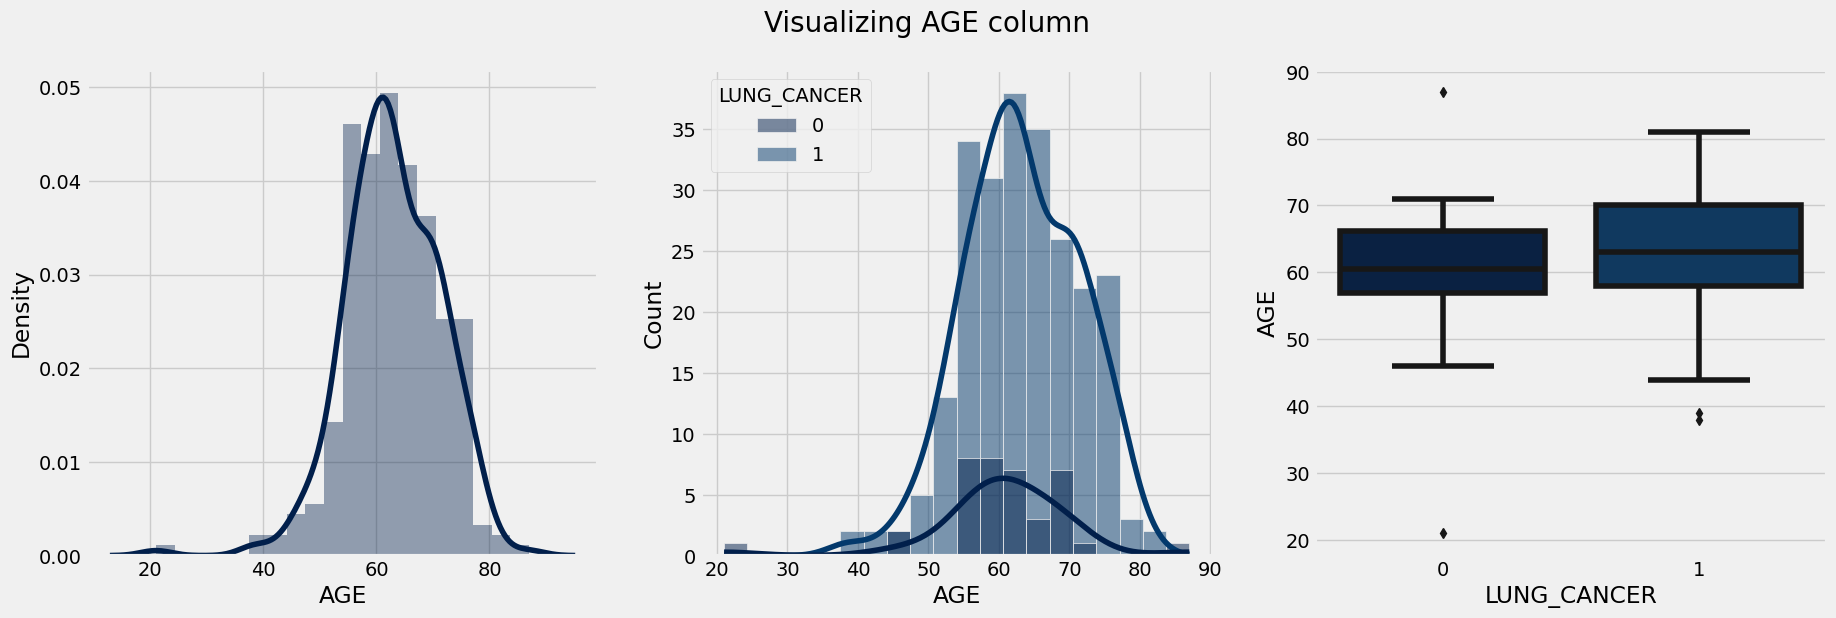

In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.distplot(df['AGE'],ax=ax[0])
sns.histplot(data =df,x='AGE',ax=ax[1],hue='LUNG_CANCER',kde=True)
sns.boxplot(x=df['LUNG_CANCER'],y=df['AGE'],ax=ax[2])
plt.suptitle("Visualizing AGE column",size=20)
plt.show()

Some outliers are present in the dataset. Inferred from box-plot.
Most common age ranges from 50-70. This was also inferred from describe method.

Text(0.5, 0.98, 'Visualizing Categorical Columns')

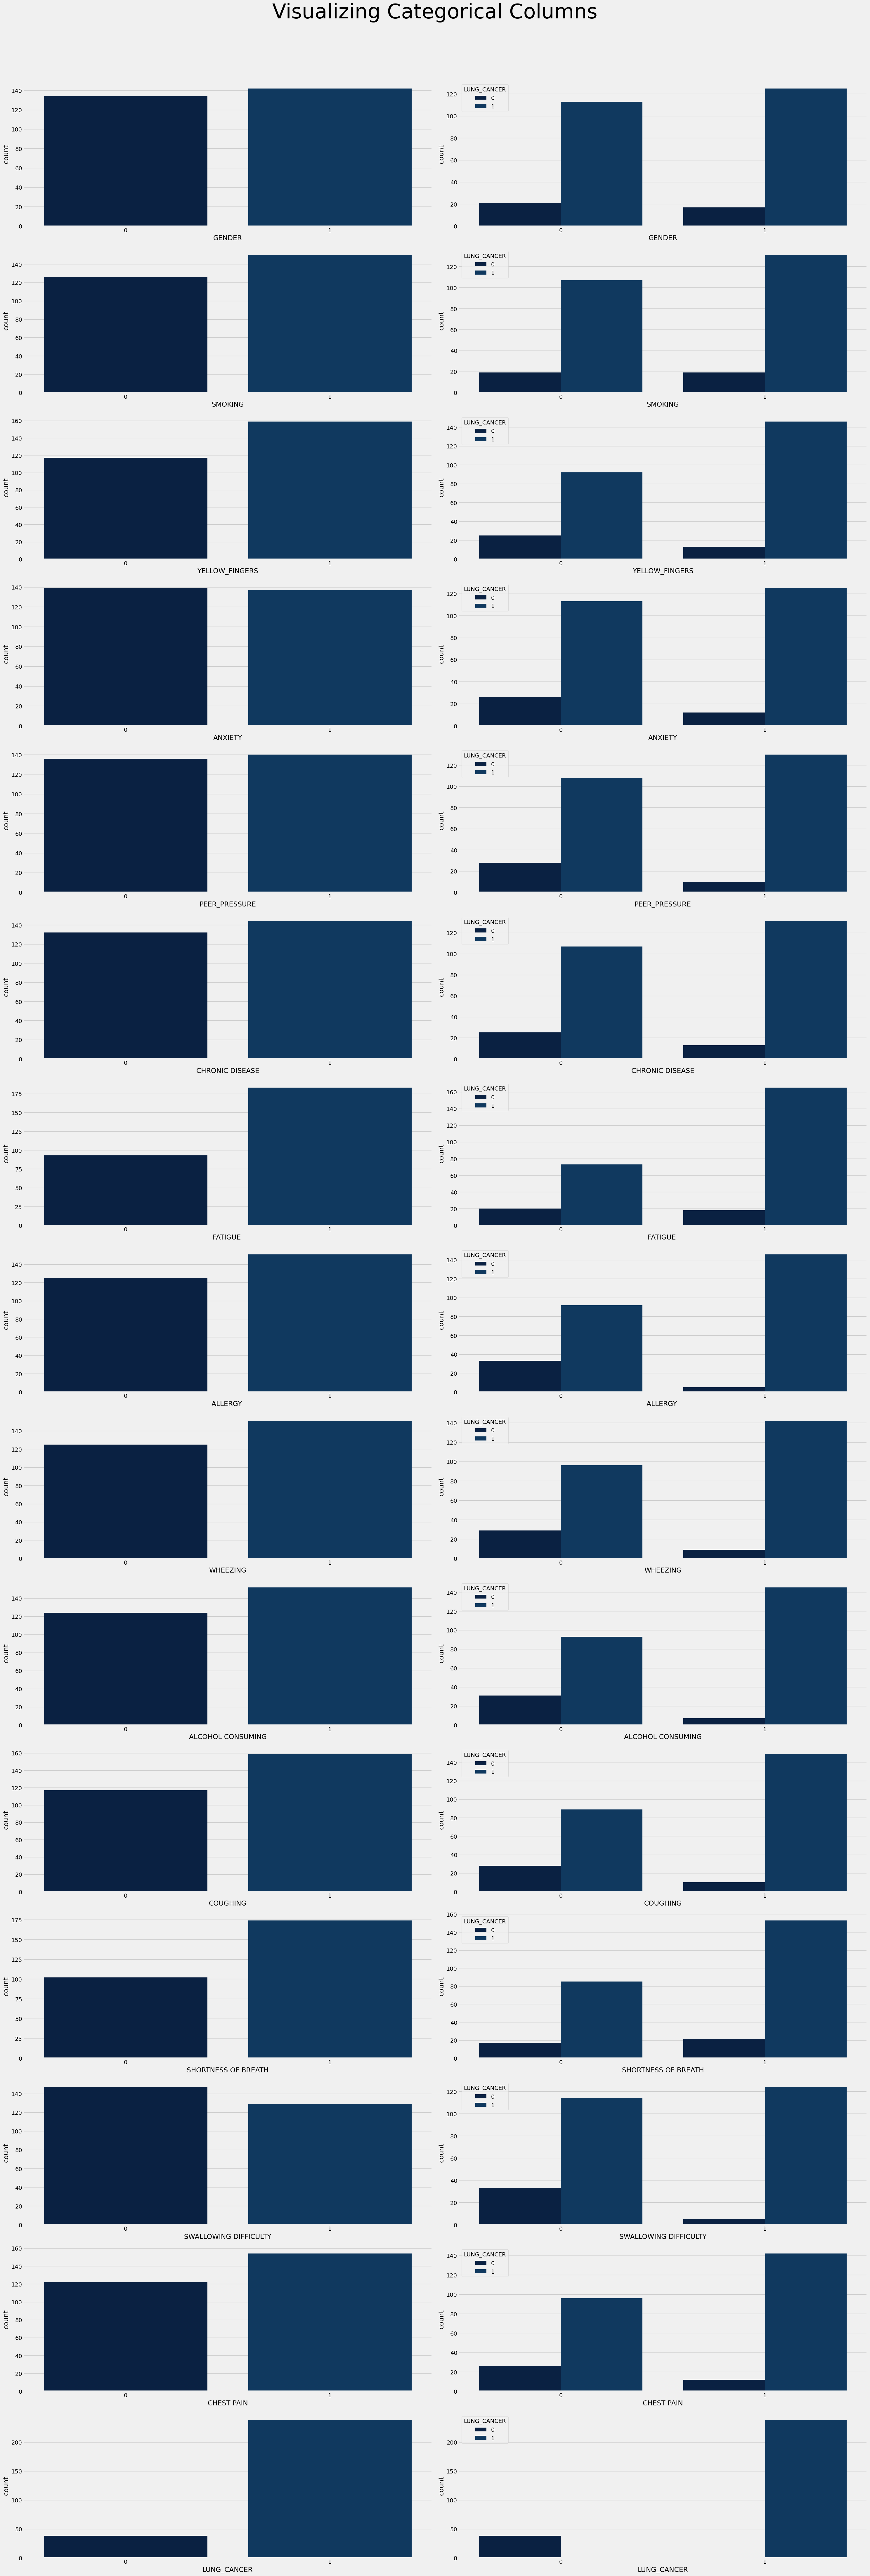

In [ ]:
fig,ax = plt.subplots(15,2,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.countplot(data=df,x=i,ax=ax[index,0])
    sns.countplot(data=df,x=i,ax=ax[index,1],hue='LUNG_CANCER')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Categorical Columns",fontsize=50)

<Axes: >

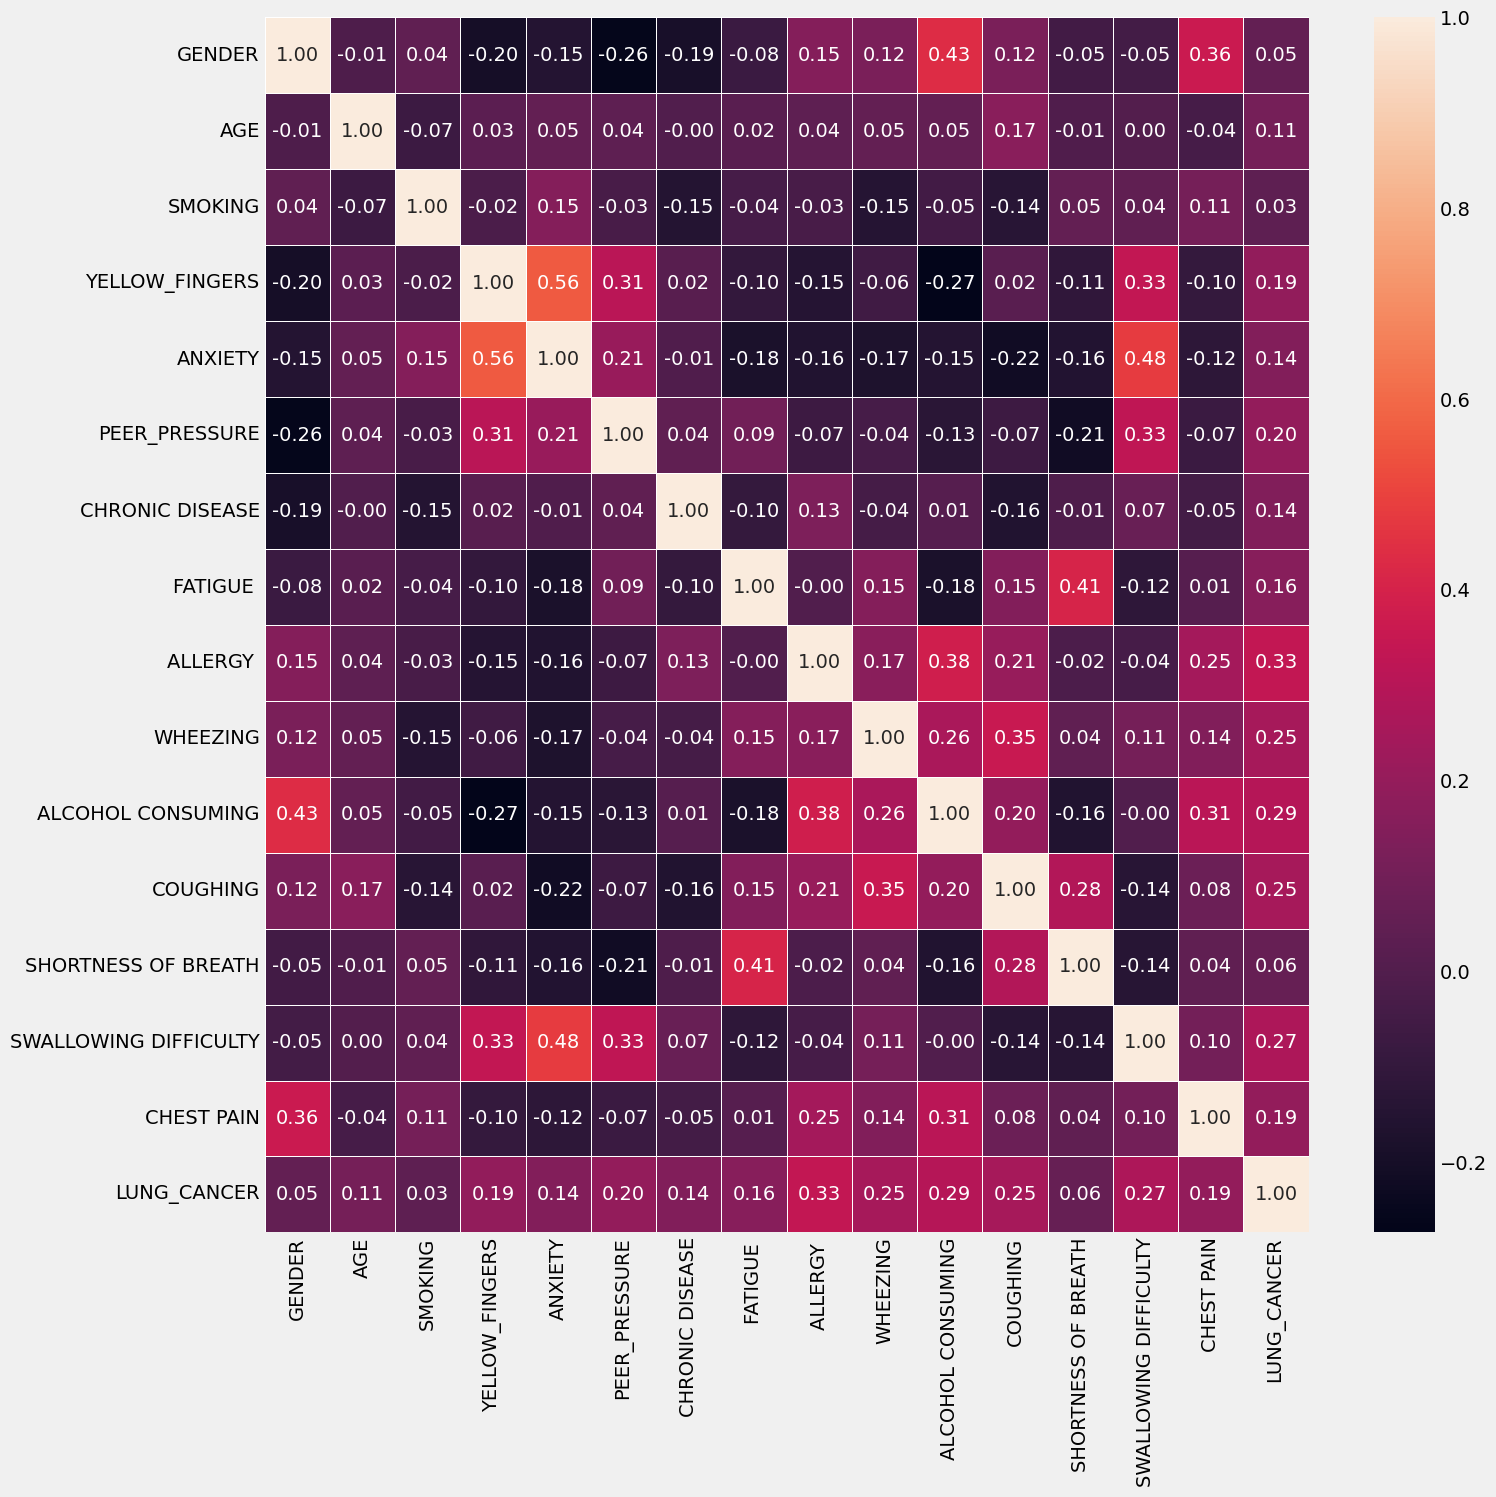

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='0.2f')

There is multicollinearity present in the data.

## Data Preprocessing

In [ ]:
#binarize target
label = LabelEncoder()
label.fit(list(df['LUNG_CANCER'].values))
b = label.transform(list(df['LUNG_CANCER'].values))

In [ ]:
#one_hot_encoding of inputs with create dummies
df.drop('LUNG_CANCER',axis=1,inplace=True)
df.drop('GENDER',axis=1,inplace=True)
df.drop('AGE',axis=1,inplace=True)
df = pd.get_dummies(df)
df.head()

,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,1,0,0,0,0,0,1,0,1,1,0,0


In [ ]:
A = df.values

In [ ]:
#train_test split
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.33, random_state=42)

## Sparce Logistic Regression (ADMM)

<br>

**Objective Function:**

The objective function is designed to minimize the logistic regression loss (cross-entropy) while incorporating an L1 regularization term for sparsity. It aims to find a set of coefficients `x` that can predict the target variable `b` from the input data `A` while penalizing large coefficients to encourage sparsity. The logistic regression loss `l` is computed for each data point and then averaged.

$minimize \; (1/2)||\sigma(A x) - b||_2^{2} + \lambda ||x||_1$

where $\sigma$ is the sigmoid fuction:

$\sigma(z) = \frac{exp(z)}{1+exp(z)} = \frac{1}{1+exp(-z)}$

<br>

**Centralized Case**:
<br>Loss minimization<br>
$ minimize \sum{l_i(A_i x_i - b_i) + r(z)}$,
subject to $x_i − z = 0, i = 1, . . . , N$

<br>

The ADMM algorithm alternates between three steps:

1. **Update `x`:** represents the model coefficients.This step minimizes the augmented Lagrangian with respect to `x`, where the augmented Lagrangian combines the logistic regression loss, the L2 regularization term, and a penalty term associated with the difference between `x` and `z`. It aims to update `x` to minimize the loss while encouraging sparsity.

2. **Update `z`:** is an auxiliary variable used in the update.`z` is updated using the `S` operator with a shrinkage threshold `λ/ρ`, which encourages sparsity. This step enforces the sparsity constraint on the model coefficients.

3. **Update `u`:** `u` is the dual variable and is updated based on the difference between `x` and `z`. It is used to enforce the equality constraint between `x` and `z`.
<br>

$x^{k+1} = argmin  (l||A x - b||_2^{2} +(\rho/2)||x - z^k + u^{k}||_2^{2} )$

$z^{k+1} = S_{λ/ρ}(x^{k+1} + u^k)$

$u^{k+1} = u^{k} + x^{k+1} - z^{k+1}$

<br>

where $l$ is the *logistic regression* cost fuction or more known as *cross-entropy*:

$ l = (-1/N)\sum{b \log(\sigma(A x)) + (1-b) \log(1 - \sigma(A x))}$

or in a more compact form:

$ l = (1/N) \sum{\log(1+exp(-b x^{T}A))} $



<br>


**Consensus form of the model**:

<br>


The formulation can also be expressed in a consensus form, where it's assumed that the data is distributed across multiple blocks. Each block is indexed by `i`, and the objective is to find a common solution `z` while taking into account the local loss functions `l_i` associated with each block.

In this consensus form, the algorithm iteratively updates `x_i` for each block `i` (similar to the centralized case), and then computes an average of the updated `x_i` values to obtain `z`. The dual variables `u_i` for each block are also updated.

This distributed version allows you to parallelize the computation across multiple blocks of data, making it suitable for situations where data is distributed across different locations or nodes.
<br>
<br>
$ minimize \sum{l_i(A_i x_i - b_i) + r(z)}$, subject to $x_i − z = 0, i = 1, . . . , N$

where $l_i$ refers to the loss function for the ith block of
data.

<br>

Consensus ADMM algorithm for Sparse Logistic Regression problem:

$x_i^{k+1} = argmin  ( l_i||A_i x_i - b_i||_2^{2} +(\rho/2)||x_i - z^k + u_i^{k}||_2^{2} )$

$z^{k+1} = S_{λ/ρN}(\overline{x}^{k+1} + \overline{u}^k)$

$u_i^{k+1} = u_i^{k} + x_i^{k+1} - z^{k+1}$

<br>

This is identical to distributed lasso, except for $x_i$ update, which here involves an $l_2$ regularized
logistic regression problem.



In [ ]:
class ADMM_Sparse_Logistic_Regression:

    def __init__(self, A, b,rho=1,alpha=0.001,parallel = False):
        self.N = A.shape[0]
        self.D = A.shape[1]
        self.A = A
        self.b = b
        self.parallel = parallel
        if self.parallel:
            self.numberOfThreads = cpu_count()  ###default=4
            self.X = np.random.randn(self.numberOfThreads, self.D)
            self.X_bar = self.X.mean(axis=0)
            self.nu = np.zeros((self.numberOfThreads, self.D))
            self.nu_bar = self.nu.mean(axis=0)
            ind = np.arange(self.N)
            np.random.shuffle(ind)
            self.ind = np.array_split(ind,self.numberOfThreads)
        else:
            self.numberOfThreads = 1
            self.X = np.random.randn(self.D)
            self.nu = np.zeros(self.D)
        self.rho = rho
        self.Z = np.zeros(self.D)
        self.alpha = alpha
        self.threshold = self.alpha/(self.rho*self.numberOfThreads)


    def soft_thresholding(self, x):
#shrinks values towards zero
        t = self.threshold
        y = np.zeros(x.shape)

        y[x >= t] = x[x >= t] - t
        y[x <= t] = x[x <= t] + t

        return(y)

    def sigmoid(self,X):
        return(1/(1+np.exp(-X)))

    def cross_entropy(self,X,A,b):
        h = self.sigmoid(A.dot(X))
        return (1/self.N)*np.sum((((-b).T.dot(np.log(h)))-((1-b).T.dot(np.log(1-h)))))


    def X_objective(self,X,*args):
        A = args[0]
        b = args[1]
        rho = args[2]
        Z = args[3]
        nu = args[4]
        return((1/self.N)*np.sum(np.log(1+np.exp(-b*A.dot(X)))) + (rho/2.0) * np.sum((X-Z+nu)**2))  ##2ND FORM
        #return(self.cross_entropy(X,A,b) + (rho/2.0) * np.sum((X-Z+nu)**2))

    def get_objective(self):
        if self.parallel:
            X = self.X_bar
            nu = self.nu_bar
        else:
            X = self.X
            nu = self.nu
        Z = self.Z
        rho = self.rho
        A = self.A
        b = self.b
        return(0.5 * norm(self.sigmoid(self.A.dot(X)) - self.b,2)**2 + self.alpha *  norm(X, 1))

    def step(self):
        #start_time = time.time()
        # Solve for X_t+1
        self.X = scipy.optimize.minimize(self.X_objective,self.X,args=(self.A,self.b,self.rho,self.Z,self.nu),method='L-BFGS-B').x
        # Solve for Z_t+1
        self.Z = self.soft_thresholding(self.X + self.nu)
        # Combine in u_t+1
        self.nu += (self.X - self.Z)
        #elapsed_time = time.time() - start_time
        #print(elapsed_time)


    def step_parallel(self):
        #t = []
        for n,k in enumerate(self.ind):
            #start_time = time.time()
            # Solve for X{i}_t+1
            self.X[n] = scipy.optimize.minimize(self.X_objective,self.X[n],args=(self.A[k],self.b[k],self.rho,self.Z,self.nu[n]),method='L-BFGS-B').x
            self.X_bar = self.X.mean(axis=0)
            # Solve for Z_t+1
            self.Z = self.soft_thresholding(self.X_bar + self.nu_bar)
            # Combine in u{i}_t+1
            self.nu[n] += (self.X[n] - self.Z)
            self.nu_bar = self.nu.mean(axis=0)
            #elapsed_time = time.time() - start_time
            #t.append(elapsed_time)

    def next_step(self):
        if self.parallel:
            self.step_parallel()
        else:
            self.step()


    def get_weights(self):
        if self.parallel:
            return(self.X_bar)
        else:
            return(self.X)

In [ ]:
#number of reps
reps = 800

##Centralized case

In [ ]:
obj_centralized = []
acc_centralized = []
model_centralized = ADMM_Sparse_Logistic_Regression(A_train,b_train,parallel=False)
obj_centralized.append(model_centralized.get_objective())
for k in tqdm_notebook(range(reps)):
    model_centralized.next_step()
    w = model_centralized.get_weights()
    y_pred = np.round(model_centralized.sigmoid(A_test.dot(w)))
    acc_centralized.append(accuracy_score(b_test, y_pred))
    obj_centralized.append(model_centralized.get_objective())

  0%|          | 0/800 [00:00<?, ?it/s]

In [ ]:
print(w)
y_pred = np.round(model_centralized.sigmoid(A_test.dot(w)))
print('Accuracy: {}'.format(accuracy_score(b_test, y_pred)))

[0.95943966 0.99107686 0.81431597 0.94654279 1.48179845 1.65421848
 0.77034589 0.59088914 0.83114963 1.02383055 0.71051823 0.33253172
 0.61253322]
Accuracy: 0.8478260869565217


## `Parallel case

In [ ]:
obj_parallel = []
acc_parallel = []
model_parallel = ADMM_Sparse_Logistic_Regression(A_train,b_train,parallel=True)
obj_parallel.append(model_parallel.get_objective())
for k in tqdm_notebook(range(reps)):
    model_parallel.next_step()
    w = model_parallel.get_weights()
    y_pred = np.round(model_parallel.sigmoid(A_test.dot(w)))
    acc_parallel.append(accuracy_score(b_test, y_pred))
    obj_parallel.append(model_parallel.get_objective())

  0%|          | 0/800 [00:00<?, ?it/s]

In [ ]:
print(w)
y_pred = np.round(model_parallel.sigmoid(A_test.dot(w)))
print('Accuracy: {}'.format(accuracy_score(b_test, y_pred)))

[0.72372694 1.36726194 0.59214912 0.80680628 1.49431938 1.63637121
 0.59258662 0.51475717 1.04771411 1.04976003 0.79216488 0.29273443
 0.69418822]
Accuracy: 0.8478260869565217


## Sklearn case

In [ ]:
from sklearn.linear_model import LogisticRegression


To use the L1 penalty, you should specify a solver that supports it. The "liblinear" and "saga" solvers are commonly used for L1 regularization in scikit-learn


In [ ]:
model_sklearn = LogisticRegression(penalty='l1', solver='liblinear')
model_sklearn.fit(A_train,b_train)
y_pred = model_sklearn.predict(A_test)
acc_sklearn = accuracy_score(b_test, y_pred)
print(model_sklearn.coef_)
print(model_sklearn.intercept_)
print('Accuracy: {}'.format(acc_sklearn))

[[0.         0.5689186  0.23634519 0.53738493 1.43974029 1.42766629
  1.59226714 0.         0.82744593 1.37674723 0.         1.37732115
  0.        ]]
[-2.26230138]
Accuracy: 0.9021739130434783


## Comparing results

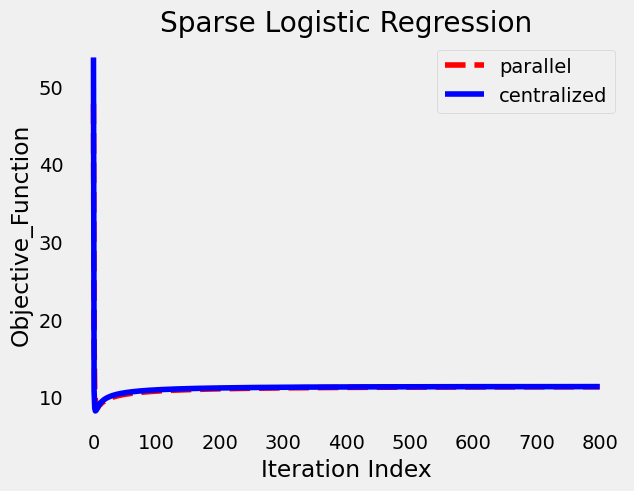

In [ ]:
t = np.arange(reps+1)
plt.plot(t,obj_parallel,linestyle='--',color='r',label='parallel')
plt.plot(t,obj_centralized,'b',label='centralized')
plt.grid()
plt.title('Sparse Logistic Regression')
plt.xlabel('Iteration Index')
plt.ylabel('Objective_Function')
plt.legend()
plt.show()

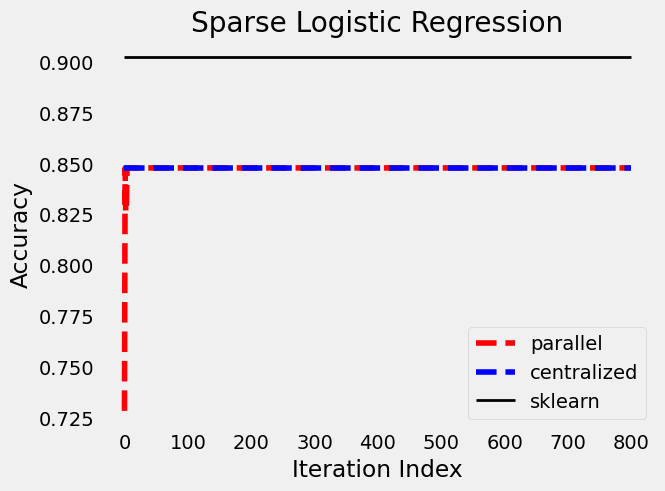

In [ ]:
t = np.arange(reps)
plt.plot(t,acc_parallel,linestyle='--',color='r',label='parallel')
plt.plot(t,acc_centralized,linestyle='--',color='b',label='centralized')
plt.plot(t,np.ones(reps)*acc_sklearn,color='black',linewidth=2,label='sklearn')
plt.grid()
plt.title('Sparse Logistic Regression')
plt.xlabel('Iteration Index')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### <ins>References</ins>

* Slides for Signal Processing for Big Data - Distributed Optimization and Statistical Learning (Sergio Barbarossa and Paolo Di Lorenzo)
* Distributed convex optimization using ADMM (Dimitris Christodouleas)
* Distributed Optimization and Statistical Learning via the Alternating Direction Method of Multipliers (R Foundations and Trends in Machine Learning Vol. 3, No. 1 (2010) 1–122 c 2011 S. Boyd, N. Parikh, E. Chu, B. Peleato and J. Eckstein DOI: 10.1561/2200000016
* Alternating Direction Method of Multipliers for Distributed Machine Learning (Sourangshu Bhattacharya)
